<a href="https://colab.research.google.com/github/v-3sg/airline_safety/blob/main/airline_safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import and Load Data**

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#load and confirm data loading
df = pd.read_csv ('airline-safety.txt', sep=',')
df

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


**Clean the Data**

In [ ]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


**--> Data types seem appropriate for each column**

In [ ]:
#check for duplicates
df.duplicated().any()

False

**--> No duplicates**

In [ ]:
df.isnull().sum()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

**--> No null values**

**Visualize/Explore the Data**

In [ ]:
#df.describe() presents avail_seat_kn_per_week in scientific notation
#use code from here to suppress scientific notation:
#https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,56.00000,56.00000,56.00000,56.00000,56.00000,56.00000,56.00000
mean,1384621304.73214,7.17857,2.17857,112.41071,4.12500,0.66071,55.51786
std,1465316894.91666,11.03566,2.86107,146.69111,4.54498,0.85868,111.33275
min,259373346.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,474036222.75000,2.00000,0.00000,0.00000,1.00000,0.00000,0.00000
50%,802908893.00000,4.00000,1.00000,48.50000,3.00000,0.00000,0.00000
75%,1847239083.25000,8.00000,3.00000,184.25000,5.25000,1.00000,83.25000
max,7139291291.00000,76.00000,14.00000,535.00000,24.00000,3.00000,537.00000


**--> Data values seem appropriate for the numerical columns.**

**--> General observations from above descriptive statistics...**

**incidents_85_99 vs incidents_00_14: mean 7 vs mean 4, max 76 vs max 24**

**fatal_accidents_85_99 vs fatal_accidents_00_14: mean 2 vs mean 1, max 14 vs max 3**

**fatalities_85_99 vs fatalities_00_14: mean 112 vs mean 56, max 535 vs max 537**

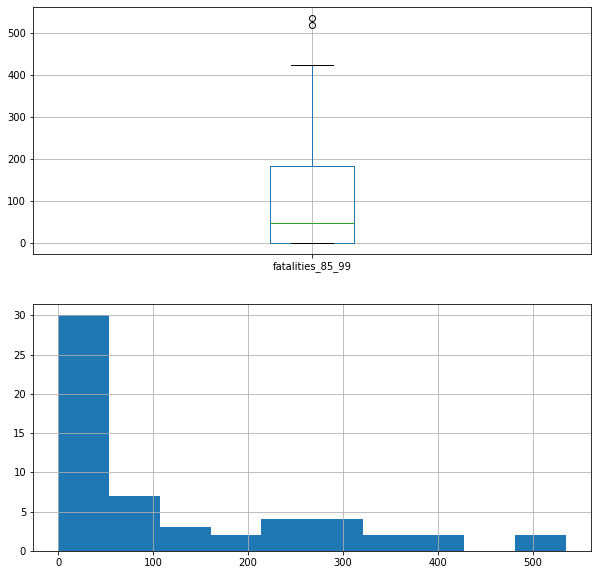

In [ ]:
#use histogram/boxplot to visualize numerical data values

plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df.boxplot(column = 'fatalities_85_99')

plt.subplot(2, 1, 2)
df['fatalities_85_99'].hist();


**--> Indicated by the boxplot and confirmed in the histogram, two outliers are present for fatalities_85_99 column.**

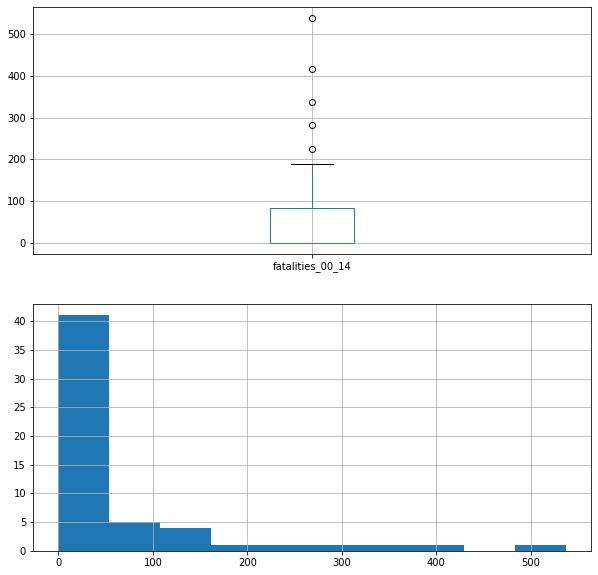

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df.boxplot(column = 'fatalities_00_14')

plt.subplot(2, 1, 2)
df['fatalities_00_14'].hist();

**--> Indicated by the boxplot and confirmed in the histogram, five outliers are present for fatalities_00_14 column.**

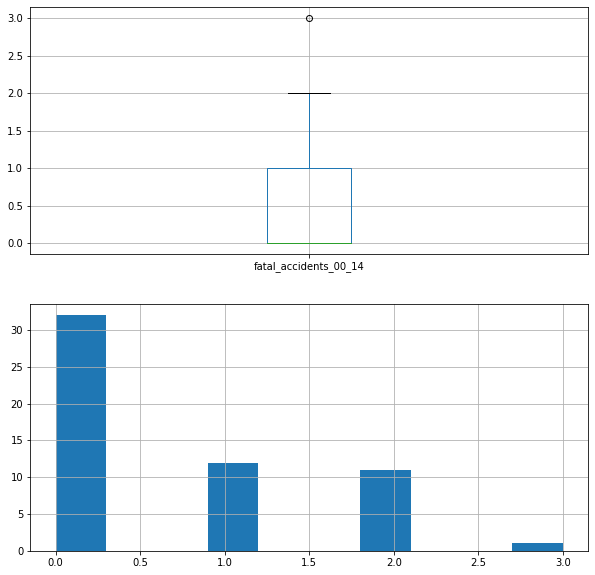

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df.boxplot(column = 'fatal_accidents_00_14')

plt.subplot(2, 1, 2)
df['fatal_accidents_00_14'].hist();

**--> Indicated by the boxplot and confirmed in the histogram, one outlier is present for fatal_accidents_00_14 column.**

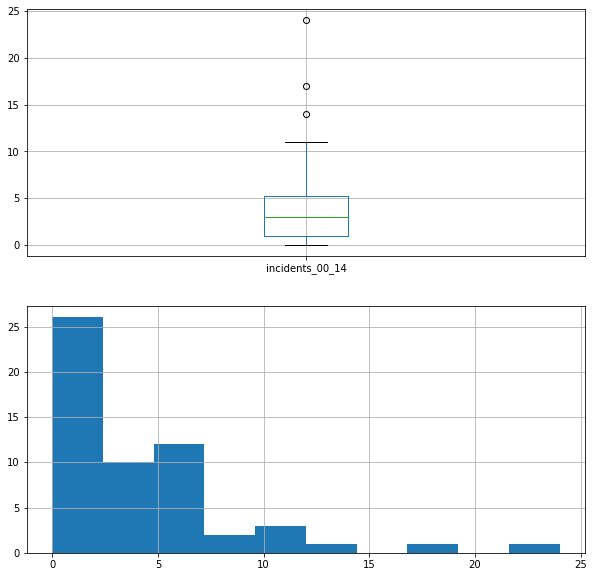

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df.boxplot(column = 'incidents_00_14')

plt.subplot(2, 1, 2)
df['incidents_00_14'].hist();

**--> Indicated by the boxplot and confirmed in the histogram, three outliers are present for incidents_00_14 column.**

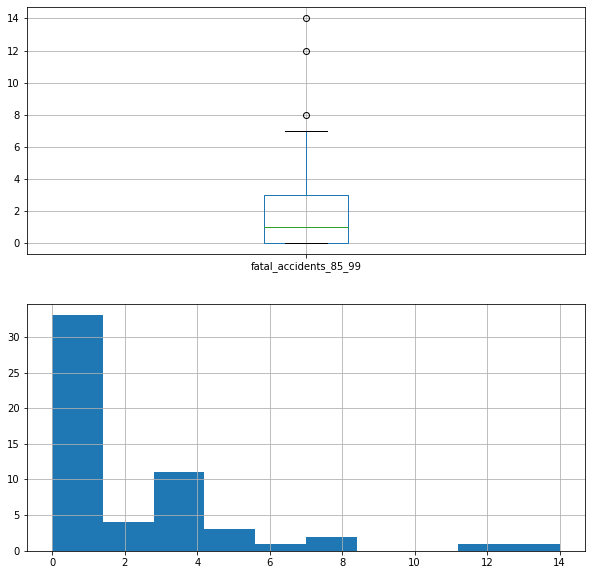

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df.boxplot(column = 'fatal_accidents_85_99')

plt.subplot(2, 1, 2)
df['fatal_accidents_85_99'].hist();

**--> Indicated by the boxplot and confirmed in the histogram, three outliers are present for fatal_accidents_85_99 column.**

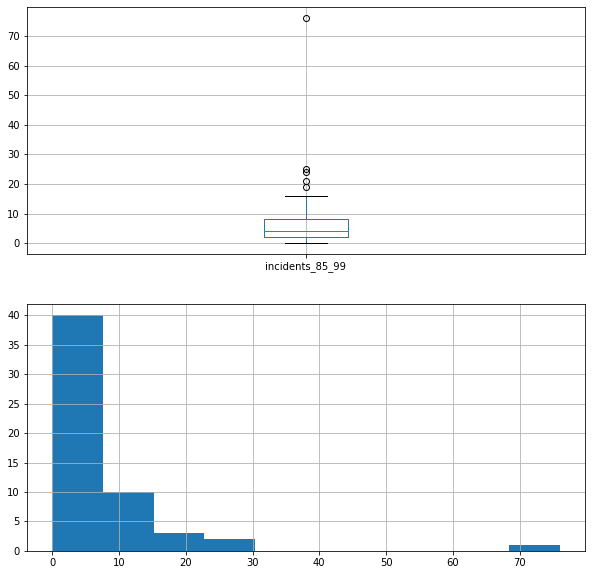

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df.boxplot(column = 'incidents_85_99')

plt.subplot(2, 1, 2)
df['incidents_85_99'].hist();

**--> Indicated by the boxplot and confirmed in the histogram, six outliers are present for incidents_85_99 column.**

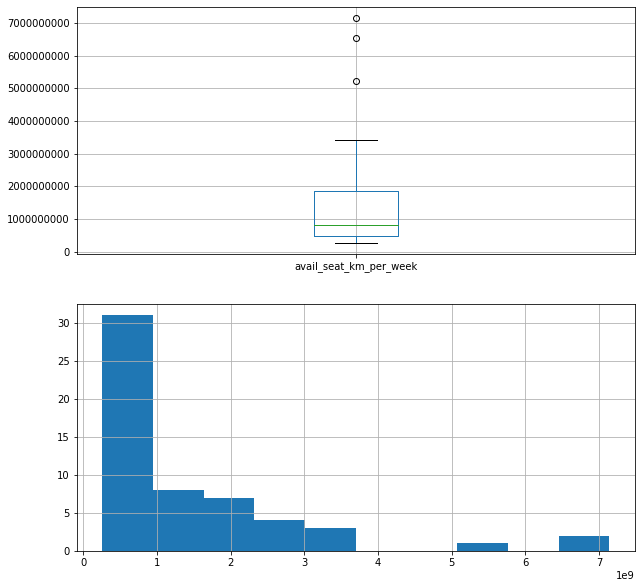

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.ticklabel_format(style='plain') #suppresses scientific notation
df.boxplot(column = 'avail_seat_km_per_week')

plt.subplot(2, 1, 2)
df['avail_seat_km_per_week'].hist();

**--> Indicated by the boxplot and confirmed in the histogram, three outliers are present for avail_seat_km_per_week column.**

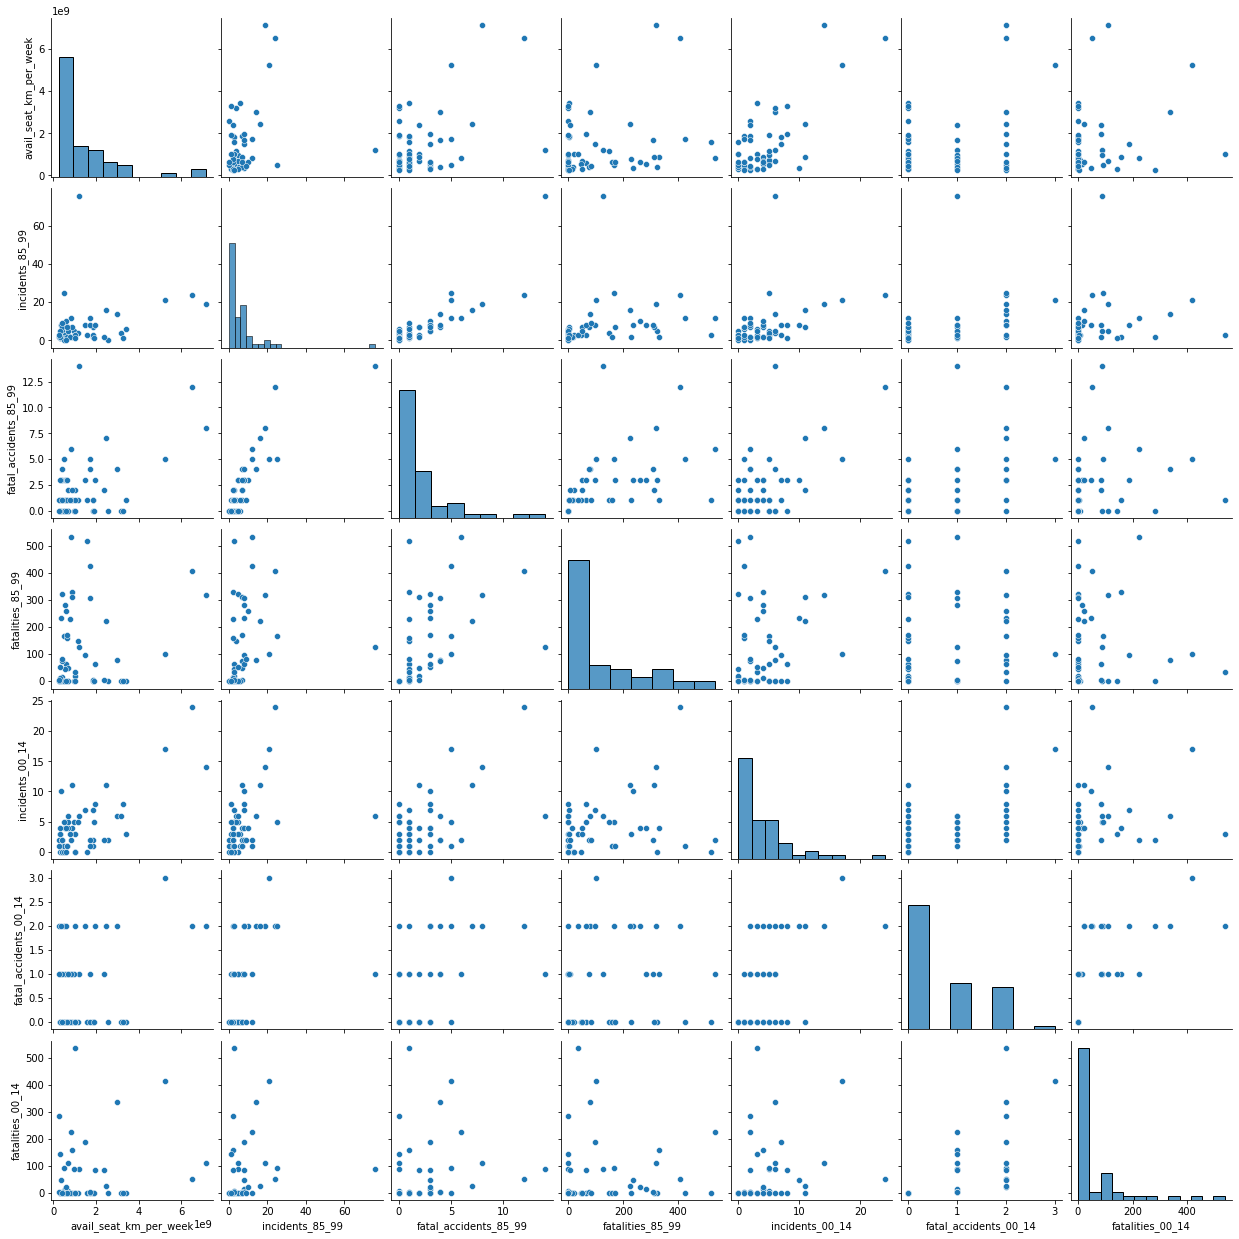

In [ ]:
#pairplot of dataframe
sns.pairplot(df);

**--> Incidents, fatal accidents, and fatalities seem to cluster within the range between greater than zero and 4 billion for avail_seat_km_per_week.**

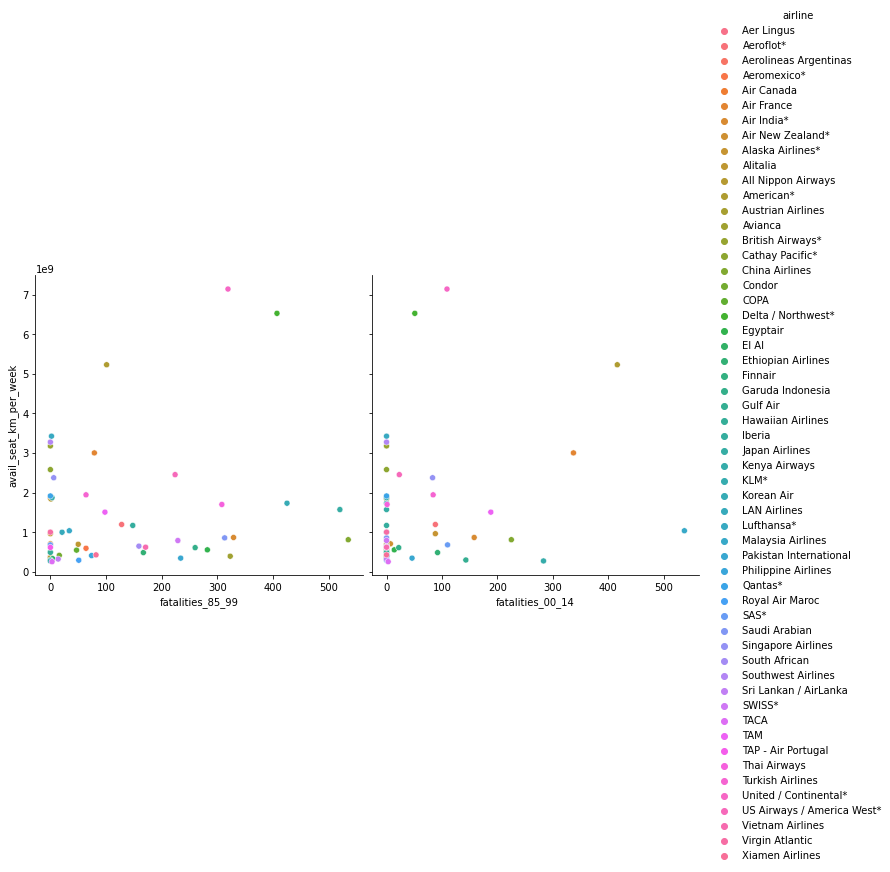

In [ ]:
#scatterplot between each of the features and the target 

sns.pairplot(df,
             x_vars = ['fatalities_85_99', 'fatalities_00_14'],
             y_vars = ['avail_seat_km_per_week'],
             hue = 'airline', height = 5);

**--> Using hues for each airline only gives an approximate grouping based on airline name position in alphabetical order; will have to drill down from color hue, check against legend, and cross reference the dataset.**

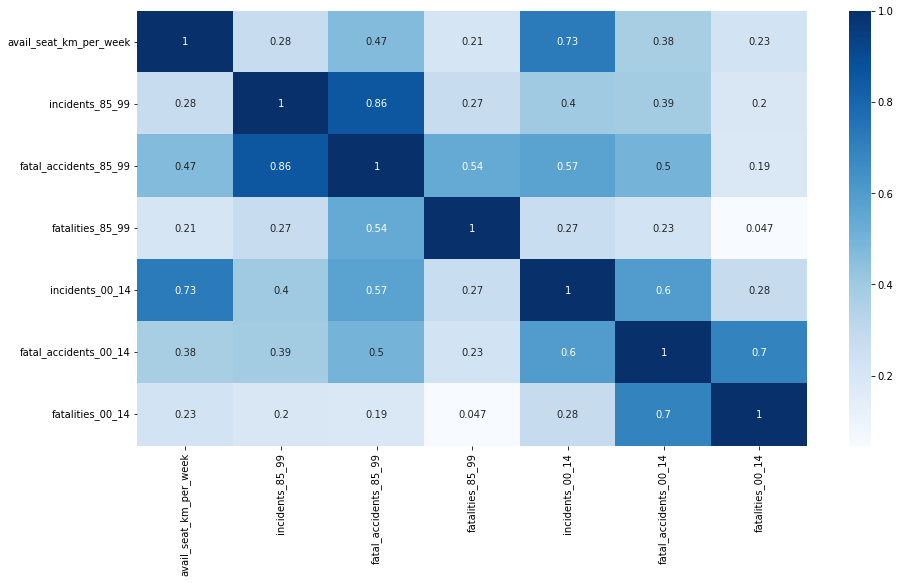

In [ ]:
#oversimplified heat map
corr = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, cmap = 'Blues', annot = True);

**--> There appears to be multicollinearity for the fatal accident and fatalities data values, which makes sense since a fatal accident has one or more fatalities.**

**--> Positive correlation between avail_seat_km_per_week and incidents_00_14 (0.73) and fatal_accidents_85_99 (0.47) and fatal_accidents_00_14 (0.38).**